# Production of alpha-tocopherol (vitamin E) in *Escherichia coli* 

## 1. Introduction by Daniel TEST

### 1.1 Literature review of the compound vitamin E

#### Vitamin E
Vitamin E is a fat-soluble vitamin that is mainly found in plant based foods, such as nuts, whole grains and vegetable oil. In resent times, vitamin E has been used as a supplement for its health benefits, either in pill or liquid form, even though it is possible to meet the recommended uptake through diet. Vitamin E is a group of eight chemical structures called tocopherols and tocotrinols, which antioxidant properties helps inhibition of free oxygen and free radical peroxidation of polyunsaturated fatty acids, making them assist in stabilizing the phospholipids of the cell membranes. 

#### Market size of vitamin E 
The global natural vitamin E market size was valued at USD 672.18 million in 2018 and is projected to reach USD 1,187.59 million by the end of 2026, exhibiting a CAGR of 7.54% during the forecast period from 2019 to 2026.

This is due to the increased awareness on personal health and fitness, where vitamins play a big part in the personal diet. There is an all round increase in the interest of vitamins, but we see an especially large increase in Asia these years. The largest market share of vitamin E is found in the aforementioned dietary supplements, with almost 50% of the market share. Followed by food and beverages with approximately 25%. The cosmetic industry is also a user of vitamin E and is responsible for appr. 10% of the market share.  

The market is increasing over all generations, like millennials, that have an increased focus on their health. Mostly, it’s the generations above 60 that in developed countries is expected to drive the sale in the future. 

#### Applications of vitamin E
The use of vitamin E has a long list of potential health benefits, among them is prevention of heart disease, a boost of the immune system as well as prevention of inflammation and lowering the risk of some forms of cancer. The research however, is very varying in its conclusion and therefore cannot be generally recommended as a form of treatment. 

Promising studies show that supplements of vitamin E could benefit people suffering from non-alcoholic fat liver disease by reducing liver enzymes and blood lipid levels, thus improving liver health. 

https://pubmed.ncbi.nlm.nih.gov/32810309/ 

Some studies show that vitamin E might delay the progression of Alzheimer’s disease, in those cases, where the progressing is mild to moderate. However, other studies have not been able to find an effect for vitamin E on Alzheimer’s disease. 

A big potential for vitamin E, is the use in skin treatment, such as eczema, psoriasis and sun burn as well as scar healing, since vitamin E in form of an oil is a great moisturizer. Studies have been made for each subject, but further research is required. 


### 1.2 Literature review of the cell factory (<500 words) Ben
The cell factory that was chosen to be used for the production of alpha-tocopherol is *Escherichia coli* K-12 MG1655. *E. coli* is not a natural producer of alpha-tocopherol but the precursors to the production pathway are present in *E. coli*. Therefore, with the addition of a few enzymatic reactions using metabolic engineering, alpha-tocopherol can be produced in E. coli. The overall process for enabling the production of alpha-tocopherol in *E. coli* begins with adding the additional enzymatic reactions to the natural metabolic pathway of *E. coli*. Secondly, optimization of the production of alpha-tocopherol through modifications to the natural *E. coli* metabolic pathway as well as the added alpha-tocopherol producing pathway takes place.  

*E. coli* was chosen as the cell factory for a multitude of reasons. To begin with, *E. coli* is a very well documented and researched bacterium that has been used copious amounts of times to produce a large array of compounds. *E. coli* is also GRAS certified and has been used many times for production of comparable products, meaning it as able to be FDA and EMA approved, which is a crucial stamp of approval when producing compounds for human consumption. Some other advantageous qualities of *E. coli* include its low cost, fast growth rates, high expression capabilities and relatively simple downstream processing [1]. These attributes of *E. coli* are very important to consider when developing a cell factory, as they have a huge influence on the feasibility for future large scale industrial applications.

Although *E. coli* seems to be a clear choice for cell factories because of all its advantages, it also has some disadvantages that need to be discussed and considered when determining the optimum cell factory design. When producing larger and more complex compounds in *E. coli*, the simple mechanisms within *E. coli* give it a low ability to perform post-translational modifications (PTMs). This can be quite problematic as PTMs are vital for the functionality of proteins. However, in this cell factory the product, vitamin E, is a relatively small molecule and not a protein and should therefore not have any issues with PTMs. Another quality of *E. coli* that can sometimes be problematic is its production of inclusion bodies. Inclusion bodies are insoluble clusters of proteins that are formed and remain in the cytoplasm of the cell. These inclusion bodies are formed as a result of misfolded proteins [2]. As these inclusion bodies remain within the cytoplasm, it causes the product purification to be more difficult, which can be a major deciding factor for industrial scale production. However as aforementioned, vitamin E is a simple compound and therefore misfolded proteins should not be an issue, but an understanding of this phenomenon is important for solving potential issues in regards to expression levels of the desired product.

[1] https://en.wikipedia.org/wiki/Escherichia_coli#Diversity 
[2] https://en.wikipedia.org/wiki/Inclusion_bodies 



## 2. Problem definition (<300 words) Kaare

The goal of the project is to come up with an engineering strategy for the heterologous production of Vitamin E (tocochromanols/-trienols) in *E. coli* through the adaption and use of a verified genome-scale metabolic model (GSM). The modelling decisions should be informed by the need of the bioprocess to be GMP-compatible, e.g. by the use of glucose as the main carbon souce. Currently, only precursors of this class of molecules of interest have been produced, in insufficient titers for real-world use and at slow rates. We hope to be able to contribute suggestions for an engineering strategy that can improve the titer and productivity of the process.


## 3. *If Project category II:* Selection and assessment of existing GSM (<500 words) Joachim

The GSM that was chosen for this project is *Escherichia coli* K-12 MG1655. Specifically, the model iML1515, the most through reconstruction of *E. coli* on a genome level, is used [http://www.nature.com/articles/nbt.3956]. Its close approximation to the wild type means most of the pathways are in position and it will also have everything mapped out when further investigat.  

According to the publication attached to the BiGG model, this model was developed on the basis of model iJO1366. This new model contains 184 new genes, 196 new reactions, updated confidence scores for the remaining reactions and it has been properly integrated with external databases, such as KEGG, PDB, and CHEBI. It can also be used by tools such as Cobra toolbox in the model’s computational format [http://www.nature.com/articles/nbt.3956]. 

The team who made iLM1515 also tested its ability to predict gene essentiality and found it to have a success rate of 93.4%. That is an increase of 3.7% over the previous model, iJO1366, which has a success rate of 89.8% [http://www.nature.com/articles/nbt.3956]. Based on this, we would expect that we can get some reliable predictions when we use iLM1515 as our project’s GSM.  

To make sure, we also use memote to assess the model’s ability to provide reliable predictions. The results we got back were that the consistency came out to a total of 98%, with the detractor being that 11.13% reactions had unbound flux. In terms of annotations, 100% of the metabolites are annotated. True to their publication, iML1515 has annotations tied to KEEG and CHEBI. The total score for metabolite annotations came out to 79%. Memote also assess the annotations for reactions, genes, and SBO terms. Their respective sub totals were rated as 81%, 63%, and 91%. Based on these numbers, iML1515 was rated to a have a total score of 91% [Lieven, Christian, Moritz E. Beber, Brett G. Olivier, Frank T. Bergmann, Meric Ataman, Parizad Babaei, Jennifer A. Bartell, et al. 2020. “MEMOTE for Standardized Genome-Scale Metabolic Model Testing.” Nature Biotechnology, March. https://doi.org/10.1038/s41587-020-0446-y]. 

It should be noted that evaluation skipped several processes that were marked as Erroneously Energy-generating Cycles. It also skipped experimental data comparisons. How much it affects the validity is not specified, but it is important to consider [Lieven, Christian, Moritz E. Beber, Brett G. Olivier, Frank T. Bergmann, Meric Ataman, Parizad Babaei, Jennifer A. Bartell, et al. 2020. “MEMOTE for Standardized Genome-Scale Metabolic Model Testing.” Nature Biotechnology, March. https://doi.org/10.1038/s41587-020-0446-y]. 

But with a score of 91%, we should be able to generate some reliable predictions with iML1515 as our GSM. 


## 4. Computer-Aided Cell Factory Engineering (<1500 words if Category II project)

As the first step, the alpha-tocopherol pathway was added to the chosen GSM (iML1515). The pathway and model were chosen based on the verifiability of the enzymes involved and the .... respectively. The pathway requires the addition of seven reactions to the wildtype GSM: five pathway reactions and two reactions to generate co-factors. The pathway is based on the KEGG PATHWAY map of the vitamin E biosynthesis section from the *E. coli*. The metabolites and reactions were added to the iML1515-model using the cobrapy library. The full pathway is shown in figure X?. 

![Overview of alpha-tocopherol biosynthesis pathway](/Vitamin%20E%20biosynthesis%20pathway.png "Overview of alpha-tocopherol biosynthesis pathway")

In [7]:
import cobra
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Metabolite, Reaction

In [4]:

WT_model = read_sbml_model('iML1515.xml')

The first branch of the native *E. coli* metabolism, is the conversion of 3-(4-hydroxyphenyl)pyruvate to homogentisate and CO2: 

In [ ]:
# Reaction 1: 3-(4-Hydroxyphenyl)pyruvate + O2 O2 --> CO2 CO2 + Homogentisate
new_reaction1 = Reaction('34HPPOR') # 4 Hydroxyphenylpyruvateoxygen oxidoreductase
homogentisate = Metabolite(
    id='hgentis_c', 
    formula = 'C8H8O4',
    compartment='c')
new_reaction1.add_metabolites({model.metabolites.get_by_id('34hpp_c'): -1, # 3-(4-Hydroxyphenyl)pyruvate
                               model.metabolites.o2_c: -1, #O2
                               homogentisate: 1, # Homogentisate
                               model.metabolites.co2_c: 1, # CO2
                              })
model.add_reactions([new_reaction1])

The rest of the pathway was added in the same way, and the new model was written to an XML-file. This was done for both pathways leading to alpha-tocopherol, although the enzyme catalyzing the conversion of beta-tocopherol to alpha-tocoperol (pathway #2 in figure X?) is not well-characterized. For this reason, the further work was based upon the model going through route #1, although the two were compared initially.


In [70]:
model = read_sbml_model('model_atocopherol.xml')

In [18]:
model_2 = read_sbml_model('model_atocopherol_2.xml')

### Characterization of basic models

The theoretical maximum productivity and yield of the two routes were calculated. These are calculated on the assumption that no carbon is used to generate biomass, thus they represent the boundaries of the process as it currently is, not actual attainable figures. The productivity is the flux through the reaction generating alpha-tocopherol (DM_avite_c) and the yield is just this flux divided by the glucose uptake rate (as this is the only carbon source in the model).

In [19]:
from cobra import Reaction, Metabolite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

First the values are calculated for route 1:

In [71]:
model.objective = model.reactions.DM_avite1_c
avite_production = model.optimize().objective_value
theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
print("Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]:", avite_production)
print("Max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]: 1.2228500311138757
Max. theoretical yield [mmol-put / mmol-glc]: 0.12228500311138757


Since alpha-tocopherol has a molecular mass of 430.7 g/mol this corresponds to approximately 0.526 g of product per gDCW per hour, and a yield of a little more than 12% on glucose.

In [25]:
model_2.objective = model_2.reactions.DM_avite1_c
avite_production = model_2.optimize().objective_value
theor_yield = avite_production / (-1*model_2.reactions.EX_glc__D_e.flux)
print("Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]:", avite_production)
print("Max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Max. alpha-tocopherol productivity [mmol gDW^-1 h^-1]: 1.2966809633784213
Max. theoretical yield [mmol-put / mmol-glc]: 0.12966809633784213


For the second model the maximal theoretical productivity yield is slighter higher, at 1.297 [mmol gDW^-1 h^-1] (558 g product per DW per hour) and almost 13%, respectively.

## Phenotypic phase plane

In order to potentially enhance the production of alpha-tocopherol in E. coli, a better understanding of the optimal growth rates is desired. A phenotypic phase plane analysis (PPP) is thus performed, which is a constraint-based method to analyze how optimal growth rates are affected by environmental variables. In the PPP analyses performed in this report the effects of the environmental variable, oxygen, was tested. Product formation and biomass generation both require carbon, and maximizing one, will thus minimize the other. This is clearly seen when plotting the phenotypic phase plane of biomass against Vitamin E productivity.

In [72]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

<AxesSubplot: title={'center': 'Biomass as a function of alpha-tocopherol production'}, xlabel='DM_avite1_c'>

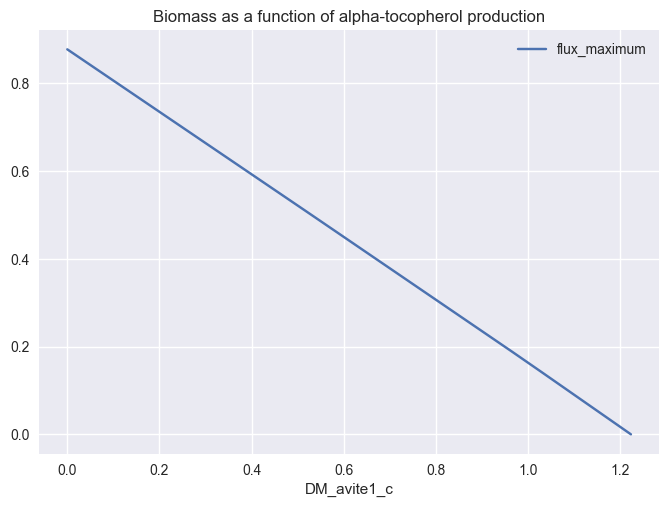

In [73]:
ppp_BIOMASS = production_envelope(model,
            reactions=[model.reactions.DM_avite1_c],
            objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_avite = production_envelope(model,
            reactions=[model.reactions.EX_glc__D_e],
            objective=model.reactions.DM_avite1_c)
ppp_o2 = production_envelope(model,
            reactions=[model.reactions.EX_o2_e],
            objective=model.reactions.DM_avite1_c)


ppp_BIOMASS.plot(x='DM_avite1_c', y='flux_maximum', title = 'Biomass as a function of alpha-tocopherol production' ) #carbon yield of biomass as function of glucose uptake

As expected, the productivity falls the higher the biomass flux, i.e.the growth rate, is. To get a realistic evaluation, the lower bound for the flux through the biomass reaction was set to approximately half of its maximum (according to the model).

In [74]:
with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    avite_production = model.optimize().objective_value
    theor_yield = avite_production / (-1*model.reactions.EX_glc__D_e.flux)
    print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
    print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 0.6133904007420847
max. theoretical yield [mmol-put / mmol-glc]: 0.06133904007420847


Forcing the model to produce biomass at half the maximal growth rate, means that less carbon can be spent on product formation, resulting in a halving of the specific productivity and yield. 

Looking at the yield as a function of the glucose uptake rate, it can be seen that there is a steep drop in yield as the glucose uptake rate gets close to zero: 

<AxesSubplot: title={'center': 'alpha-tocopherol yield as a function of glucose uptake rate'}, xlabel='EX_glc__D_e'>

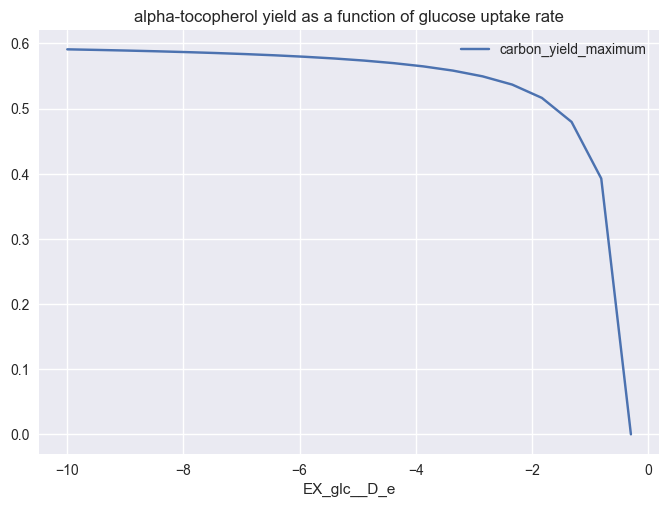

In [75]:
ppp_avite.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'alpha-tocopherol yield as a function of glucose uptake rate') #carbon yield of putrescine as function of glucose uptake

This seems to be in accordance with the experimental observation, where at low growth rates, the relative portion of carbon spent on cell maintenance is higher, leading to lower yields per unit substrate.

The effect of the oxygen uptake rate showed a similar trend, with the difference that specific productivity drops at both extremes:

<AxesSubplot: title={'center': 'alpha-tocopherol production as a function of oxygen exchange reaction flux'}, xlabel='EX_o2_e'>

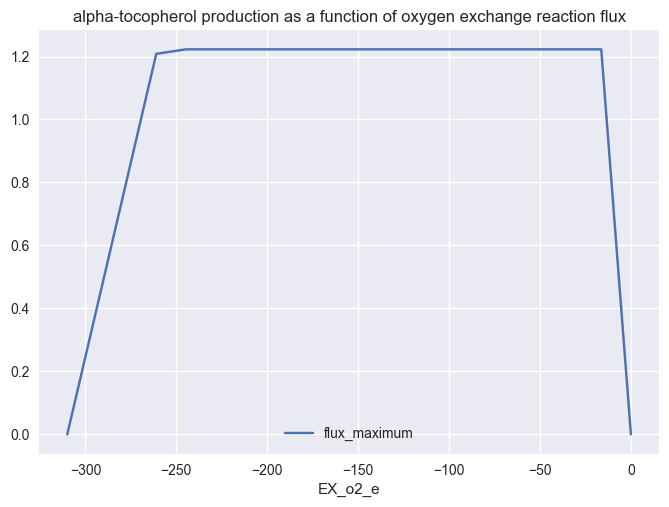

In [76]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of oxygen exchange reaction flux')


It makes sense that at low and zero oxygen uptake, there will be poor specific growth due to high cell stress and death.

# Addition of tyrosine improves metrics

As is shown in the pathway overview, one of the main precursors of 3-(4-hydroxyphenyl)pyruvate is tyrosine. Therefore it was hypothesized that the addition of tyrosine to the media could increase the fluxes through the production pathway, leading to a higher productivity. In order to test it, tyrosine was added to the growth medium at a flux of 10 [mmol / gDW / hr]  to yield the resulting model:

In [77]:
model_tyr = read_sbml_model('model_atocopherol_tyr.xml')

In [78]:
with model_tyr:
    model_tyr.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    solution = model_tyr.optimize()
    avite_production = model_tyr.optimize().objective_value
    theor_yield = avite_production / (-1*model_tyr.reactions.EX_glc__D_e.flux)
print('Maximum theoretical biomass productivity:', solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'], '/h') 
print("max. alpha-tocopherol production [mmol gDW^-1 h^-1]:", avite_production)
print("max. theoretical yield [mmol-put / mmol-glc]:", theor_yield)

Maximum theoretical biomass productivity: 0.44 /h
max. alpha-tocopherol production [mmol gDW^-1 h^-1]: 0.798972020336699
max. theoretical yield [mmol-put / mmol-glc]: 0.0798972020336699


When tested at half the maximal growth rate the new model showed an increase in both specific productivity and yield, approximately a 30% improvement. A phenotype phase plane was created to model the tyrosine exchange reaction versus productivity to investigate further:

In [79]:
ppp_tyr = production_envelope(model_tyr,
            reactions=[model_tyr.reactions.EX_tyr__L_e],
            objective=model_tyr.reactions.DM_avite1_c)

<AxesSubplot: title={'center': 'alpha-tocopherol production as a function of tyrosine exchange reaction flux'}, xlabel='EX_tyr__L_e'>

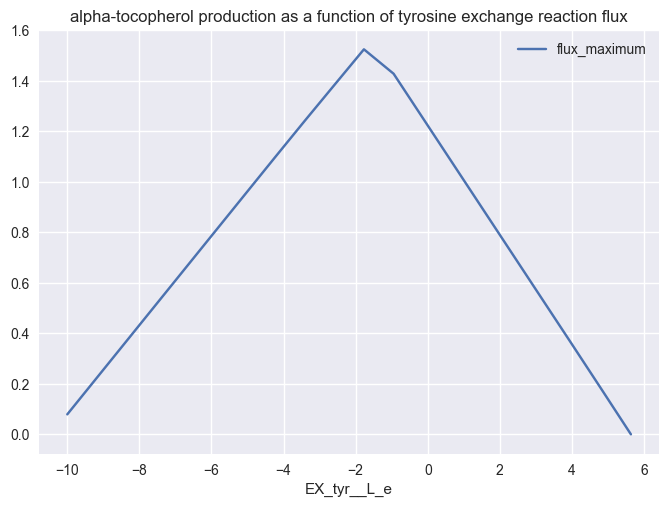

In [80]:
ppp_tyr.plot(x='EX_tyr__L_e', y='flux_maximum', title = 'alpha-tocopherol production as a function of tyrosine exchange reaction flux')

Upon closer inspection of the figure, we can see that the highest production of alpha-tocopherol occurs when tyrosine influx is 1.77. 

The PPP analysis was further continued to model the effects anaerobic conditions on the optimal growth rate, to potentially obtain more information regarding the effects of an anaerobic environment on this cell factory model. However, the only conclusion that could be drawn from the anaerobic PPP analysis is that the cell factory does not produce any fluxes without oxygen present, confirming that the model used requires an aerobic process. 

## Gene optimization algorithms

The cell-factory was sought to be further improved by using the gene-knockout optimization algorithms KnockOpt and OptGene. The solutions can be found in the folder "3_Gene_knockout_algorithms".

In the case of KnockOpt, the solution it returned was to delete the reaction "GLYCTO4", which corresponds to the glycolate oxidase. When this was done, it resulted in a change at the 13th decimal place of the theoretical productivity of alpha-tocopherol.

In the case of OptGene, the algorithm did not return any solution.

## 5. Discussion (<500 words) Joachim

## 6. Conclusion (<200 words) BEN

Overall conclusions of the theoretically engineered cell factory design for the production of alpha-tocopherol (Vitamin E) in the E. coli model iML1515. The addition of the necessary metabolic pathways for the production of Vitamin E, was successful. However, as the additional pathways are far from the natural metabolism of the iML1515 model, fluxes of Vitamin E were initially low. Nonetheless, after further investigation into the metabolic pathway, it was predicted that the addition of Tyrosine; a metabolite of the alpha-tocopherol pathway, to the media, could cause an increase the flux of Vitamin E production. This hypothesis was proven correct as after the addition of Tyrosine to the media, the production of Vitamin E was increased by 30%. Although this is an improvement, further modifications to the metabolic pathways and optimizations could be done to increase the production. Therefore, this report provides a basis of the understanding of the metabolic processes required to produce alpha-tocopherol in E. coli and potential ways of improving the cell factory design. However, for industrial implementation of this cell factory, further optimizations would need to occur to meet the industrial Vitamin E production quantities required.

## References